# Clustering: extraindo padrões de dados

## 02. Obtendo os clusters

### 04. Obtendo a base de dados

In [2]:
import pandas as pd

dataframe = pd.read_csv("data/CC GENERAL.csv")
dataframe.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 05. Organizando os dados

In [3]:
# vamos retirar os atributos que não serão úteis na nossa análise. No caso, "cust_id" e "tenure"

dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [4]:
#agora, procuraremos os "missing data'

missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [5]:
#preencheremos os valores faltantes com a mediana daquele atributo na tabela

dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [6]:
# precisamos normalizar os dados agora para o intervalo [0,1]

from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [7]:
type(values)

numpy.ndarray

In [8]:
type(dataframe.values)

numpy.ndarray

### 06. Executando o clustering

In [9]:
# criaremos os clusteres com o KMeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)

y_pred = kmeans.fit_predict(values)

## 03. Entendendo os critérios e métricas de validação

### 04. Critérios de validação

### 05. Matemática do Silhouette

### 06. Calculando o Silhouette

In [10]:
from sklearn import metrics

labels = kmeans.labels_  #recupera as labels da variável "kmeans" criada na aula 02/06
silhouette = metrics.silhouette_score(values, labels,
                                      metric='euclidean')  #values sao os valores preprocessados e noralizados na aula 02/05
print(silhouette)

#o valor do silhouette vai de [-1,1]

0.36457606314711744


## 04. Entendendo e Calculando o Índice Davies-Bouldin

### 05. Calculando o Davies-Bouldin

In [11]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.0749530537541765


## 05. Entendendo e Calculando o Índice Calinski-Harabasz

### 07. Calculando o Calinski

In [12]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.5800207486095


## 06. Validando os clusters

### 04. A validação relativa

In [13]:
# função que recebe o numero de clusters para ser passado como parametro ao KMeans e o dataset e ela calcula as três métricas de validação

def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [14]:
# 3 clusters

s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.32723725045744956 1.3087180692590692 3526.4587169299925


In [15]:
# 5

s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36443927743081506 1.0758787031571042 3431.782548172111


In [16]:
# 10

s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.3516850089287173 1.1130682222927704 3019.110566311723


In [17]:
# 20

s4, dbs4, calinski4 = clustering_algorithm(20, values)
print(s4, dbs4, calinski4)

0.29488682170521874 1.2250420367127322 2403.782101501746


In [18]:
# 50

s5, dbs5, calinski5 = clustering_algorithm(50, values)
print(s5, dbs5, calinski5)

0.24722485208565478 1.2415720060457935 1617.1220775692248


### 05. A estrutura dos clusters

In [19]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [20]:
import numpy as np

random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)

#comparamos os valores desse ensaio com o random data
print(s, dbs, calinski)

#desse feito acima
print(s2, dbs2, calinski2)


0.03943365492949244 3.5417440942614333 301.6956721276886
0.36443927743081506 1.0758787031571042 3431.782548172111


### 06. A estabilidade dos clusters

In [21]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36860891867648515 1.0563346979449357 1204.111582769171
0.35406999696241026 1.1389554530299943 1194.945411949724
0.36719816355485774 1.0982776424078395 1167.5124673818946


## 07. Visualizando os clusters

### 04. Gerando gráficos

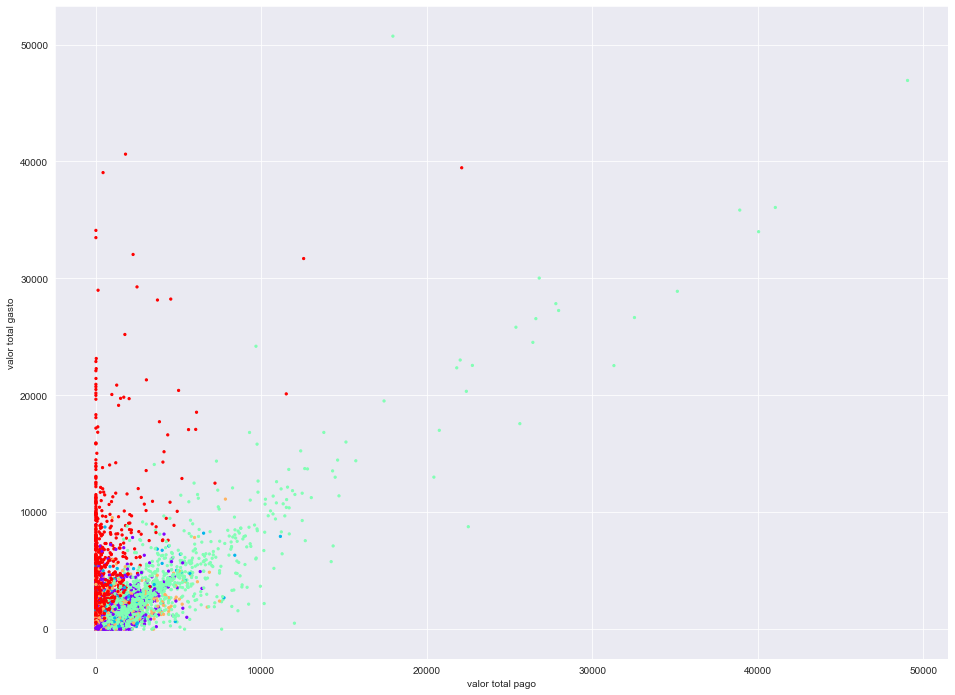

In [22]:
#faremos um gráfico purchases x payments usando pyplot do matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show()

### 05. Interpretação visual

In [23]:
import seaborn as sns

dataframe["cluster"] = labels  #uma nova coluna pro dataframe em que receberá os labels

# sns.pairplot(dataframe[0:], hue='cluster')

## 08. Entendendo os valores dos atributos no cluster

### 04. Descrevendo os atributos

In [24]:
#veremos estatísticas descritivas agrupadas por "cluster"

dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3284.0   445.102105   847.653849   0.000000    23.396562   
1         399.0  1963.743393  1836.283217  70.794108  1007.928213   
2        1544.0  1143.323704  1662.446912   0.000000   212.974614   
3        2642.0  3044.938037  2482.240438   6.824905  1263.747824   
4        1081.0  1800.909055  1979.686042   0.000000   509.872908   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          83.076265   412.596088   9630.367575            3284.0  0.774331   
1        1316.179352  2127.610649  11670.179850             399.0  0.989170   
2         556.818403  1372.545949  19043.138560            1544.0  0.927532   
3        2173.994774  4241.510992  18495.558550            2642.0  0.964891   
4        1100.941072  2321.846501  14581.459140            1081.0  0.862756   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       249.152357   4483.503862           3284.0  0.246505   
1        ...      7305.064790  76406.207520            399.0  0.020108   
2        ...       525.802344  18621.013310           1544.0  0.277309   
3        ...      1331.858565   8345.641905           2642.0  0.001772   
4        ...       886.322345  21235.065300           1081.0  0.115960   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346644  0.0  0.0  0.000000  0.444444  1.0  
1        0.092247  0.0  0.0  0.000000  0.000000  1.0  
2        0.366536  0.0  0.0  0.083333  0.545455  1.0  
3        0.023236  0.0  0.0  0.000000  0.000000  0.6  
4        0.186377  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

### 05. Analisando os valores

In [25]:
# o centroide de cada dimensao (atributo) para cada cluster


centroids = kmeans.cluster_centers_
print(centroids)

[[6.92595308e-02 2.30686023e-04 1.21382295e-01 4.79315402e-02
  7.35508613e-02 2.47153466e-02 1.72659283e-04 3.36343950e-05
  1.40157387e-04 7.96901589e-06 1.25450247e-04 2.86056694e-03
  9.43498125e-01 1.53749473e-01 5.68773030e-02 7.60565847e-05]
 [3.24769127e-01 2.64261579e-04 1.56170300e-01 3.18471811e-02
  1.24720355e-01 5.86525519e-02 1.64152214e-04 2.30217302e-05
  1.47862104e-04 1.95436118e-05 4.28386224e-04 3.82953041e-03
  3.69551388e-01 2.52333724e-01 6.88501438e-01 4.42920215e-06]
 [1.60282475e-01 2.44976409e-04 4.37904148e-01 2.56849464e-01
  1.81225639e-01 2.59402903e-02 2.04235686e-04 8.89741230e-05
  1.50490244e-04 9.43845624e-06 1.73362399e-04 6.16864361e-03
  6.02872332e-01 4.03908363e-01 8.57564447e-02 7.17211541e-05]
 [5.06008804e-01 2.73199069e-04 6.26436989e-02 3.68644377e-02
  2.58010236e-02 2.49962891e-01 6.84607127e-05 2.62761411e-05
  4.56720931e-05 5.70264270e-05 1.14528182e-03 1.35307476e-03
  7.18700948e-01 1.66343271e-01 1.80691979e-01 5.33603955e-07]
 [2.

In [26]:
# vamos analisar a variancia do centroide para cada atributo através dos cluster

### 06. Selecionando os atributos

In [27]:
#variância do centróide pra cada um dos atributos

max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0223
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0228
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0366
PAYMENTS 
0.0273
MINIMUM_PAYMENTS 
0.0558
PRC_FULL_PAYMENT 
0.0000


In [28]:
# Selecionamos os atributos BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS e MINIMUM_PAYMENTS, que são aqueles que possuem apenas um zero após a vírgula. OS colocaremos lado a lado na célula seguinte como apenas conteúdo markdown.

'''
BALANCE = limite disponível do cliente
PURCHASES = valor total de compras
CASH_ADVANCE = valor total de saques
CREDIT_LIMIT = limite total de crédito
PAYMENTS = valor total pago
MINIMUM_PAYMENTS = o mínimo pago
'''

'\nBALANCE = limite disponível do cliente\nPURCHASES = valor total de compras\nCASH_ADVANCE = valor total de saques\nCREDIT_LIMIT = limite total de crédito\nPAYMENTS = valor total pago\nMINIMUM_PAYMENTS = o mínimo pago\n'

BALANCE 0.0224
PURCHASES 0.0196
CASH_ADVANCE 0.0226
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280
MINIMUM_PAYMENTS 0.0542

### 07. Filtrando os valores

In [29]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         445.102105   628.639333    143.824757   5131.606811   813.968250   
1        1963.743393   850.298471    417.369198   2210.275689  1339.214906   
2        1143.323704  3266.487766    183.835583   4092.072637  3044.597207   
3        3044.938037   389.000167   1621.851847   4489.610144   968.134662   
4        1800.909055   466.019473   3287.022132   3987.068651  4667.483007   

         n_clients  
cluster             
0             3284  
1              399  
2             1544  
3             2642  
4             1081  


C:\Users\bruno\AppData\Local\Temp\ipykernel_10148\2936027417.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


## 09. Interpretando os clusters

### 04. Interpretando os clusters (Parte 1)

CLUSTER 0: clientes com os menores valores em gastos.
CLUSTER 1: clientes com os maiores valores em gastos.
CLUSTER 2:
CLUSTER 3:
CLUSTER 4:

### 05. Organizando os dados

In [ ]:
# vamos retirar os atributos que não serão úteis na nossa análise. No caso, "cust_id" e "tenure"

dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

In [ ]:
#agora, procuraremos os "missing data'

missing = dataframe.isna().sum()
print(missing)

In [ ]:
#preencheremos os valores faltantes com a mediana daquele atributo na tabela

dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

In [ ]:
# precisamos normalizar os dados agora para o intervalo [0,1]

from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
print(values)

In [ ]:
type(values)

In [ ]:
type(dataframe.values)

### 06. Executando o clustering

In [ ]:
# criaremos os clusteres com o KMeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)

y_pred = kmeans.fit_predict(values)

## 03. Entendendo os critérios e métricas de validação

### 04. Critérios de validação

### 05. Matemática do Silhouette

### 06. Calculando o Silhouette

In [ ]:
from sklearn import metrics

labels = kmeans.labels_  #recupera as labels da variável "kmeans" criada na aula 02/06
silhouette = metrics.silhouette_score(values, labels,
                                      metric='euclidean')  #values sao os valores preprocessados e noralizados na aula 02/05
print(silhouette)

#o valor do silhouette vai de [-1,1]

## 04. Entendendo e Calculando o Índice Davies-Bouldin

### 05. Calculando o Davies-Bouldin

In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

## 05. Entendendo e Calculando o Índice Calinski-Harabasz

### 07. Calculando o Calinski

In [ ]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

## 06. Validando os clusters

### 04. A validação relativa

In [ ]:
# função que recebe o numero de clusters para ser passado como parametro ao KMeans e o dataset e ela calcula as três métricas de validação

def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [ ]:
# 3 clusters

s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

In [ ]:
# 5

s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

In [ ]:
# 10

s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

In [ ]:
# 20

s4, dbs4, calinski4 = clustering_algorithm(20, values)
print(s4, dbs4, calinski4)

In [ ]:
# 50

s5, dbs5, calinski5 = clustering_algorithm(50, values)
print(s5, dbs5, calinski5)

### 05. A estrutura dos clusters

In [ ]:
dataframe.count()

In [ ]:
import numpy as np

random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)

#comparamos os valores desse ensaio com o random data
print(s, dbs, calinski)

#desse feito acima
print(s2, dbs2, calinski2)


### 06. A estabilidade dos clusters

In [ ]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

## 07. Visualizando os clusters

### 04. Gerando gráficos

In [ ]:
#faremos um gráfico purchases x payments usando pyplot do matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show()

### 05. Interpretação visual

In [ ]:
import seaborn as sns

dataframe["cluster"] = labels  #uma nova coluna pro dataframe em que receberá os labels

# sns.pairplot(dataframe[0:], hue='cluster')

## 08. Entendendo os valores dos atributos no cluster

### 04. Descrevendo os atributos

In [ ]:
#veremos estatísticas descritivas agrupadas por "cluster"

dataframe.groupby("cluster").describe()

### 05. Analisando os valores

In [ ]:
# o centroide de cada dimensao (atributo) para cada cluster


centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
# vamos analisar a variancia do centroide para cada atributo através dos cluster

### 06. Selecionando os atributos

In [ ]:
#variância do centróide pra cada um dos atributos

max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

In [ ]:
# Selecionamos os atributos BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS e MINIMUM_PAYMENTS, que são aqueles que possuem apenas um zero após a vírgula. OS colocaremos lado a lado na célula seguinte como apenas conteúdo markdown.

'''
BALANCE = limite disponível do cliente
PURCHASES = valor total de compras
CASH_ADVANCE = valor total de saques
CREDIT_LIMIT = limite total de crédito
PAYMENTS = valor total pago
MINIMUM_PAYMENTS = o mínimo pago
'''

BALANCE 0.0224
PURCHASES 0.0196
CASH_ADVANCE 0.0226
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280
MINIMUM_PAYMENTS 0.0542

### 07. Filtrando os valores

In [ ]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

## 09. Interpretando os clusters

### 04. Interpretando os clusters (Parte 1)

CLUSTER 0: Clientes que gastam pouco.
CLUSTER 1: Clientes que mais gastam. O foco deles é saque.
CLUSTER 2: Clientes que gastam muito com compras.
CLUSTER 3: Clientes que gastam muito com saques.
CLUSTER 4:

### 05. Interpretando os clusters (Parte 2)

CLUSTER 0: Clientes que gastam pouco.
CLUSTER 1: Clientes que mais gastam. O foco deles é saque.
CLUSTER 2: Clientes que gastam muito com compras.
CLUSTER 3: Clientes que gastam muito com saques.
CLUSTER 4: Clientes com o menor limite.

In [ ]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

In [ ]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.
CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.
CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.
CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.
CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

### 06. Os padrões de cada cluster

### 05. Organizando os dados

In [30]:
# vamos retirar os atributos que não serão úteis na nossa análise. No caso, "cust_id" e "tenure"

dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

KeyError: "['CUST_ID', 'TENURE'] not found in axis"

In [ ]:
#agora, procuraremos os "missing data'

missing = dataframe.isna().sum()
print(missing)

In [ ]:
#preencheremos os valores faltantes com a mediana daquele atributo na tabela

dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

In [ ]:
# precisamos normalizar os dados agora para o intervalo [0,1]

from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
print(values)

In [ ]:
type(values)

In [ ]:
type(dataframe.values)

### 06. Executando o clustering

In [ ]:
# criaremos os clusteres com o KMeans

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)

y_pred = kmeans.fit_predict(values)

## 03. Entendendo os critérios e métricas de validação

### 04. Critérios de validação

### 05. Matemática do Silhouette

### 06. Calculando o Silhouette

In [ ]:
from sklearn import metrics

labels = kmeans.labels_  #recupera as labels da variável "kmeans" criada na aula 02/06
silhouette = metrics.silhouette_score(values, labels,
                                      metric='euclidean')  #values sao os valores preprocessados e noralizados na aula 02/05
print(silhouette)

#o valor do silhouette vai de [-1,1]

## 04. Entendendo e Calculando o Índice Davies-Bouldin

### 05. Calculando o Davies-Bouldin

In [ ]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

## 05. Entendendo e Calculando o Índice Calinski-Harabasz

### 07. Calculando o Calinski

In [ ]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

## 06. Validando os clusters

### 04. A validação relativa

In [ ]:
# função que recebe o numero de clusters para ser passado como parametro ao KMeans e o dataset e ela calcula as três métricas de validação

def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [ ]:
# 3 clusters

s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

In [ ]:
# 5

s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

In [ ]:
# 10

s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

In [ ]:
# 20

s4, dbs4, calinski4 = clustering_algorithm(20, values)
print(s4, dbs4, calinski4)

In [ ]:
# 50

s5, dbs5, calinski5 = clustering_algorithm(50, values)
print(s5, dbs5, calinski5)

### 05. A estrutura dos clusters

In [ ]:
dataframe.count()

In [ ]:
import numpy as np

random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)

#comparamos os valores desse ensaio com o random data
print(s, dbs, calinski)

#desse feito acima
print(s2, dbs2, calinski2)


### 06. A estabilidade dos clusters

In [ ]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

## 07. Visualizando os clusters

### 04. Gerando gráficos

In [ ]:
#faremos um gráfico purchases x payments usando pyplot do matplotlib

import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show()

### 05. Interpretação visual

In [ ]:
import seaborn as sns

dataframe["cluster"] = labels  #uma nova coluna pro dataframe em que receberá os labels

# sns.pairplot(dataframe[0:], hue='cluster')

## 08. Entendendo os valores dos atributos no cluster

### 04. Descrevendo os atributos

In [ ]:
#veremos estatísticas descritivas agrupadas por "cluster"

dataframe.groupby("cluster").describe()

### 05. Analisando os valores

In [ ]:
# o centroide de cada dimensao (atributo) para cada cluster


centroids = kmeans.cluster_centers_
print(centroids)

In [ ]:
# vamos analisar a variancia do centroide para cada atributo através dos cluster

### 06. Selecionando os atributos

In [ ]:
#variância do centróide pra cada um dos atributos

max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

In [ ]:
# Selecionamos os atributos BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT, PAYMENTS e MINIMUM_PAYMENTS, que são aqueles que possuem apenas um zero após a vírgula. OS colocaremos lado a lado na célula seguinte como apenas conteúdo markdown.

'''
BALANCE = limite disponível do cliente
PURCHASES = valor total de compras
CASH_ADVANCE = valor total de saques
CREDIT_LIMIT = limite total de crédito
PAYMENTS = valor total pago
MINIMUM_PAYMENTS = o mínimo pago
'''

BALANCE 0.0224
PURCHASES 0.0196
CASH_ADVANCE 0.0226
CREDIT_LIMIT 0.0360
PAYMENTS 0.0280
MINIMUM_PAYMENTS 0.0542

### 07. Filtrando os valores

In [ ]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

## 09. Interpretando os clusters

### 04. Interpretando os clusters (Parte 1)

CLUSTER 0: Clientes que gastam pouco.
CLUSTER 1: Clientes que mais gastam. O foco deles é saque.
CLUSTER 2: Clientes que gastam muito com compras.
CLUSTER 3: Clientes que gastam muito com saques.
CLUSTER 4:

### 05. Interpretando os clusters (Parte 2)

CLUSTER 0: Clientes que gastam pouco.
CLUSTER 1: Clientes que mais gastam. O foco deles é saque.
CLUSTER 2: Clientes que gastam muito com compras.
CLUSTER 3: Clientes que gastam muito com saques.
CLUSTER 4: Clientes com o menor limite.

In [32]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         445.102105   628.639333    143.824757   5131.606811   813.968250   
1        1963.743393   850.298471    417.369198   2210.275689  1339.214906   
2        1143.323704  3266.487766    183.835583   4092.072637  3044.597207   
3        3044.938037   389.000167   1621.851847   4489.610144   968.134662   
4        1800.909055   466.019473   3287.022132   3987.068651  4667.483007   

         n_clients  
cluster             
0             3284  
1              399  
2             1544  
3             2642  
4             1081  


C:\Users\bruno\AppData\Local\Temp\ipykernel_10148\2936027417.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]


In [33]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3284.0,0.246505,0.346644,0.0,0.0,0.000000,0.444444,1.0
1,399.0,0.020108,0.092247,0.0,0.0,0.000000,0.000000,1.0
2,1544.0,0.277309,0.366536,0.0,0.0,0.083333,0.545455,1.0
3,2642.0,0.001772,0.023236,0.0,0.0,0.000000,0.000000,0.6
4,1081.0,0.115960,0.186377,0.0,0.0,0.083333,0.142857,1.0


CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.
CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.
CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.
CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.
CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

### 06. Os padrões de cada cluster